In [12]:
from energy_sharingv2 import *

spline_path = '/home/dylan/pioneer/atar_waveform/dylansversion/BNL_Signal_Response.root' 
root_path = '/home/dylan/pioneer/simulationdata/pienux_out_stripped.root'

class_version = digitizeatar(spline_path)

class_version.build_spline()

spline = class_version.build_spline()

# f = uproot.open(spline_path)
# h = f['pmax_histogram'].to_hist()
# out = class_version.build_spline()
# xs = np.linspace(h.axes[0].centers[0], h.axes[0].centers[-1], 1000)
# ys = class_version.build_spline()(xs)
# fig, ax = plt.subplots()
# plt.plot(xs, ys)

class_version.compute_energy_sharing(root_path, spline, entry = 0)



In [14]:
mod_path = '/home/dylan/pioneer/atar_waveform/dylansversion/digitizedpienux_out_stripped.root'
with uproot.open(mod_path) as f:
    array = f['digitized_atar']['pixel_edep'].array()
    print(len(array))

357


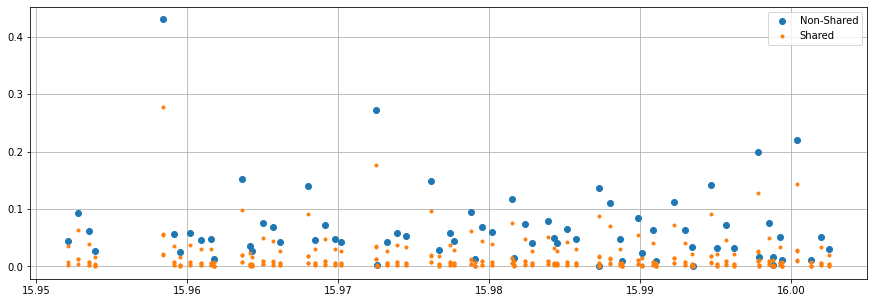

In [15]:
from energy_sharingv2 import *

atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

output = uproot.open('/home/dylan/pioneer/atar_waveform/dylansversion/digitizedpienux_out_stripped.root:digitized_atar')

fig,ax = plt.subplots(figsize=(15,5))
plt.plot(atar['pixel_time'].array()[0], atar['pixel_edep'].array()[0],"o", label='Non-Shared')
plt.plot(output['pixel_time'], output['pixel_edep'],".", label='Shared')

plt.grid()
plt.legend()
plt.show()